In [1]:
import sys
import os
import pandas as pd

sys.path.append(os.path.abspath('../scripts'))

In [2]:
from db_connection import load_data
load_data

<function db_connection.load_data(db_params, query)>

In [3]:
DB_PARAMS = {
    'dbname': 'telecom',
    'user': 'postgres',
    'password': 'admin',
    'host': 'localhost',
    'port': '5432'
}

# SQL query to execute
query = "SELECT * FROM xdr_data;"

# Load data using psycopg2
df = load_data(DB_PARAMS, query)


c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_2\kifiya_week_2\scripts\db_connection.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


In [4]:
from analysis  import top_n_handsets
top_n_handsets(df)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

In [5]:
from analysis  import (top_n_manufacturers,top_5_handsets_per_manufacturer,aggregate_user_data,handle_missing_values,basic_metrics,
                       segment_users_by_duration,plot_univariate_analysis,compute_dispersion_params,bivariate_analysis,correlation_analysis
                       ,perform_pca)
top_manufacturers=top_n_manufacturers(df)
print (top_manufacturers)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [7]:

# Top 5 Handsets per Top 3 Manufacturers
top_5_per_manufacturer = top_5_handsets_per_manufacturer(df, top_manufacturers.index)
print(top_5_per_manufacturer)


Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: count, dtyp

In [6]:
# Aggregated User Behavior Data
agg = aggregate_user_data(df)
print(agg.head(5))


    User MSISDN  Total Sessions  Total Duration (ms)  Total Download (Bytes)  \
0  3.360100e+10               1             116720.0            8.426375e+08   
1  3.360100e+10               1             181230.0            1.207552e+08   
2  3.360100e+10               1             134969.0            5.566597e+08   
3  3.360101e+10               1              49878.0            4.019932e+08   
4  3.360101e+10               2              37104.0            1.363130e+09   

   Total Upload (Bytes)  Social Media Download (Bytes)  \
0            36053108.0                      2206504.0   
1            36104459.0                      2598548.0   
2            39306820.0                      3148004.0   
3            20327526.0                       251469.0   
4            94280527.0                      2861230.0   

   Google Download (Bytes)  Email Download (Bytes)  YouTube Download (Bytes)  \
0                3337123.0                837400.0                14900201.0   
1         

In [7]:
# Handling missing values
agg_cleaned = handle_missing_values(df)

In [8]:
# Basic metrics
metrics = basic_metrics(agg)
print(metrics)

                                       Mean        Median       Std Dev
User MSISDN                    4.511474e+10  3.366365e+10  2.889423e+12
Total Sessions                 1.389777e+00  1.000000e+00  8.098627e-01
Total Duration (ms)            1.461672e+05  1.027400e+05  1.863587e+05
Total Download (Bytes)         6.336527e+08  5.703677e+08  4.645551e+08
Total Upload (Bytes)           5.730942e+07  4.679387e+07  3.565765e+07
Social Media Download (Bytes)  2.502081e+06  2.265000e+06  1.887588e+06
Google Download (Bytes)        8.016496e+06  7.256742e+06  6.065160e+06
Email Download (Bytes)         2.497352e+06  2.266259e+06  1.897063e+06
YouTube Download (Bytes)       1.621461e+07  1.460547e+07  1.232294e+07
Netflix Download (Bytes)       1.620639e+07  1.463991e+07  1.231717e+07
Gaming Download (Bytes)        5.882158e+08  5.325190e+08  4.440290e+08
Other Download (Bytes)         5.869916e+08  5.299489e+08  4.437790e+08


In [9]:
# Segment users into decile classes
decile_stats = segment_users_by_duration(agg)
print(decile_stats)

   Decile  Total Download (Bytes)  Total Upload (Bytes)
0       0            4.989842e+12          4.494350e+11
1       1            5.604102e+12          5.053079e+11
2       2            5.992652e+12          5.437496e+11
3       3            5.533562e+12          5.006783e+11
4       4            4.716541e+12          4.271904e+11
5       5            5.892924e+12          5.333274e+11
6       6            5.646784e+12          5.056942e+11
7       7            7.169970e+12          6.522641e+11
8       8            8.535245e+12          7.702495e+11
9       9            1.362797e+13          1.235959e+12


In [10]:
dispersion_results = compute_dispersion_params(agg)
print(dispersion_results)

                                   Variance       Std Dev         Range  \
User MSISDN                    8.348768e+24  2.889423e+12  8.823635e+14   
Total Sessions                 6.558775e-01  8.098627e-01  1.800000e+01   
Total Duration (ms)            3.472955e+10  1.863587e+05  1.854661e+07   
Total Download (Bytes)         2.158114e+17  4.645551e+08  8.147916e+09   
Total Upload (Bytes)           1.271468e+15  3.565765e+07  7.267105e+08   
Social Media Download (Bytes)  3.562987e+12  1.887588e+06  4.274382e+07   
Google Download (Bytes)        3.678617e+13  6.065160e+06  1.161062e+08   
Email Download (Bytes)         3.598847e+12  1.897063e+06  3.360711e+07   
YouTube Download (Bytes)       1.518549e+14  1.232294e+07  2.378830e+08   
Netflix Download (Bytes)       1.517126e+14  1.231717e+07  1.994792e+08   
Gaming Download (Bytes)        1.971618e+17  4.440290e+08  7.622033e+09   
Other Download (Bytes)         1.969398e+17  4.437790e+08  8.025474e+09   
Decile                   

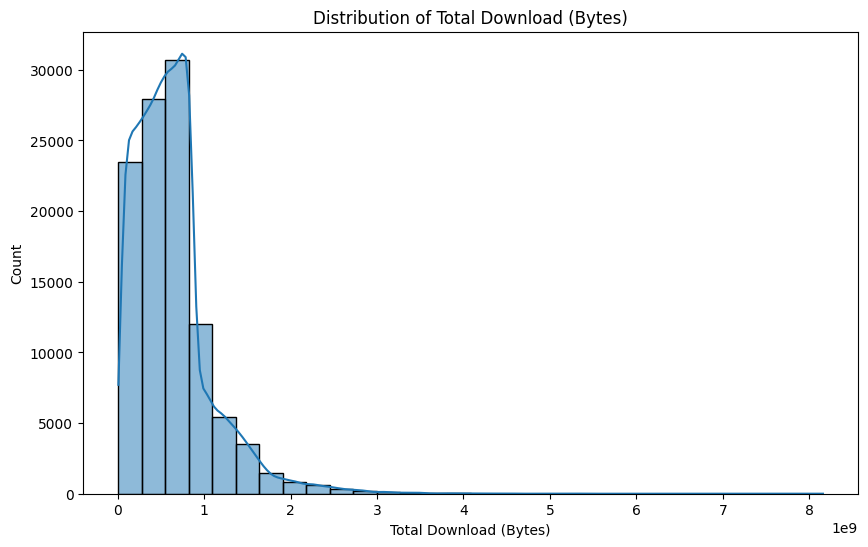

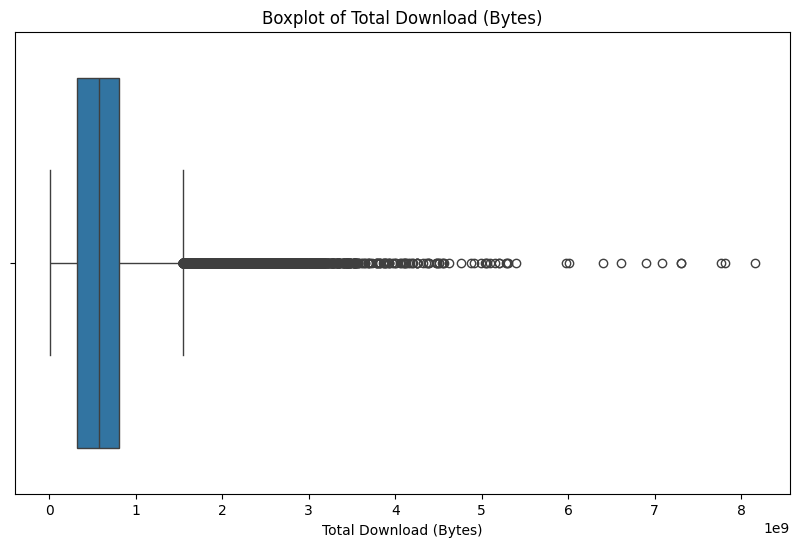

In [11]:
# Perform univariate analysis on Total Download
plot_univariate_analysis(agg, 'Total Download (Bytes)')



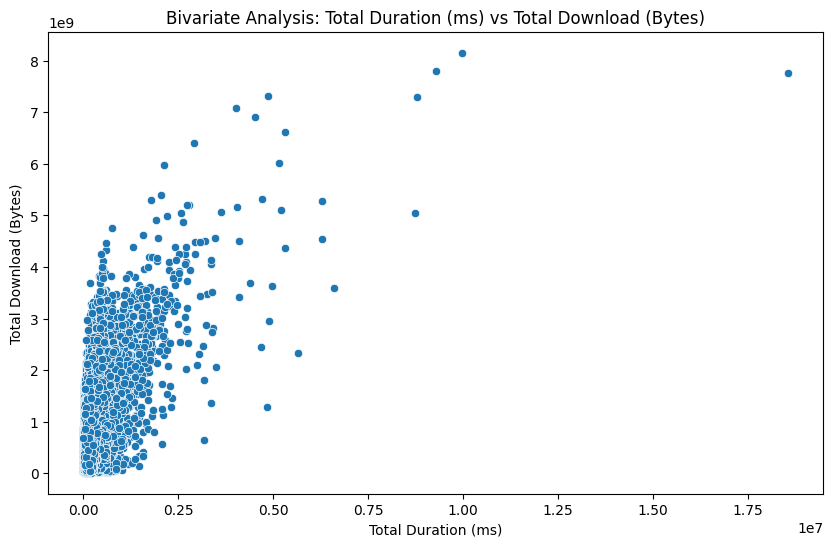

In [12]:
# Bivariate analysis between total session duration and total download
bivariate_analysis(agg, 'Total Duration (ms)', 'Total Download (Bytes)')



In [ ]:
# Correlation analysis
correlation_matrix = correlation_analysis(agg)